# **Group 9 Project Objective:** Predict the number of courier pickups in a pickup zone at a time interval e.g: an hour of a day in a month. 

Assumption(s): Courier pickup time is ReadyTime

Frame the problem: Supervised Learning/Regression

In [ ]:
# Project Group #9
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [ ]:
#Mount your Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Get the Data**

In [ ]:
# Get dataset
filepath1 = "/content/gdrive/My Drive/Colab Notebooks/Group 9 Project/2019 Detailed.csv"
df2019 = pd.read_csv(filepath1)

In [ ]:
df = df2019.copy()

In [ ]:
df.head()

,OrderNo,ServiceTypeID,ServiceType,ScheduledOrder,ScheduledOrderNo,VehicleTypeID,VehicleType,Pieces,Weight(lbs),ReadyTime,DeliverBy,PickupZone,DeliveryZone,ReadyTime(DayOfWeek),DayOfWeekID,ReadyTime(Hour),TimeWindowID,TimeWindowDescription,DateType,DateTypeID
0,6917458,1,DIRECT,1,1045,2,CAR,1 PACK,3.0,01/01/2019 01:00,01/01/2019 08:30,L1Z,L7C,Tuesday,3,1,1,Before 8am,Holiday,1
1,6918082,1,DIRECT,0,0,2,CAR,1 LETTER(S),0.5,01/01/2019 05:53,01/01/2019 07:53,L4C,M5B,Tuesday,3,5,1,Before 8am,Holiday,1
2,6917518,1,DIRECT,1,2236,2,CAR,1 OTHER,1.0,01/01/2019 07:30,01/01/2019 15:00,L3P,L9P,Tuesday,3,7,1,Before 8am,Holiday,1
3,6917520,1,DIRECT,1,2247,2,CAR,1 OTHER,1.0,01/01/2019 07:30,01/01/2019 15:00,L3P,L9P,Tuesday,3,7,1,Before 8am,Holiday,1
4,6917521,1,DIRECT,1,2248,2,CAR,1 OTHER,1.0,01/01/2019 07:30,01/01/2019 09:30,L3P,L3R,Tuesday,3,7,1,Before 8am,Holiday,1


***Explore the Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157458 entries, 0 to 157457
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   OrderNo                157458 non-null  int64  
 1   ServiceTypeID          157458 non-null  int64  
 2   ServiceType            157458 non-null  object 
 3   ScheduledOrder         157458 non-null  int64  
 4   ScheduledOrderNo       157458 non-null  int64  
 5   VehicleTypeID          157458 non-null  int64  
 6   VehicleType            157458 non-null  object 
 7   Pieces                 157043 non-null  object 
 8   Weight(lbs)            157458 non-null  float64
 9   ReadyTime              157458 non-null  object 
 10  DeliverBy              157458 non-null  object 
 11  PickupZone             157458 non-null  object 
 12  DeliveryZone           157458 non-null  object 
 13  ReadyTime(DayOfWeek)   157458 non-null  object 
 14  DayOfWeekID            157458 non-nu

Attribute: Pieces has missing values

In [ ]:
df.describe()

,OrderNo,ServiceTypeID,ScheduledOrder,ScheduledOrderNo,VehicleTypeID,Weight(lbs),DayOfWeekID,ReadyTime(Hour),TimeWindowID,DateTypeID
count,1.574580e+05,157458.000000,157458.000000,157458.000000,157458.000000,157458.000000,157458.000000,157458.000000,157458.000000,157458.000000
mean,7.172112e+06,9.690533,0.340726,576.783606,2.054224,12.501998,4.139802,10.946138,4.911907,2.026223
std,1.498291e+05,15.309837,0.473955,911.196833,0.409973,41.374504,1.465111,2.888788,2.629723,0.173627
min,6.910397e+06,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,7.041987e+06,1.000000,0.000000,0.000000,2.000000,1.000000,3.000000,9.000000,3.000000,2.000000
50%,7.170742e+06,3.000000,0.000000,0.000000,2.000000,1.000000,4.000000,10.000000,4.000000,2.000000
75%,7.300914e+06,3.000000,1.000000,1148.000000,2.000000,10.000000,5.000000,12.000000,6.000000,2.000000
max,7.466916e+06,49.000000,1.000000,2649.000000,15.000000,4122.000000,7.000000,23.000000,11.000000,3.000000


In [ ]:
# Check features for unique values
df_unique = df.nunique()
df_unique

OrderNo                  157458
ServiceTypeID                 6
ServiceType                   6
ScheduledOrder                2
ScheduledOrderNo            533
VehicleTypeID                 7
VehicleType                   7
Pieces                     1069
Weight(lbs)                 544
ReadyTime                 61259
DeliverBy                 42178
PickupZone                  402
DeliveryZone                588
ReadyTime(DayOfWeek)          7
DayOfWeekID                   7
ReadyTime(Hour)              24
TimeWindowID                 11
TimeWindowDescription        11
DateType                      3
DateTypeID                    3
dtype: int64

In [ ]:
# Look at composition of unique values
date_type = df.DateType.value_counts()
date_type

Weekday    152603
Weekend      4492
Holiday       363
Name: DateType, dtype: int64

In [ ]:
service_type = df.ServiceType.value_counts()
service_type

SAMEDAY                51873
DIRECT                 51013
DAILY SCHEDULED        18787
RUSH                   17750
4 HOUR                 13309
SPECIALIZED COURIER     4726
Name: ServiceType, dtype: int64

In [ ]:
ScheduledOrder = df.ScheduledOrder.value_counts()
ScheduledOrder

0    103808
1     53650
Name: ScheduledOrder, dtype: int64

In [ ]:
timewindow_description =  df.TimeWindowDescription.value_counts()
timewindow_description

9am-10am      35248
10am-11am     30050
11am-12pm     24877
8am-9am       16594
After 5pm     12911
12pm-1pm      11254
1pm-2pm        8382
2pm-3pm        6368
3pm-4pm        5565
Before 8am     4604
4pm-5pm        1605
Name: TimeWindowDescription, dtype: int64

In [ ]:
vehicle_type = df.VehicleType.value_counts()
vehicle_type

CAR                         151024
MINI VAN                      6155
FULL SIZE VAN                  216
STRAIGHT TRUCK                  40
AGENT                           18
DEDICATED STRAIGHT TRUCK         4
3-TON TRUCK                      1
Name: VehicleType, dtype: int64

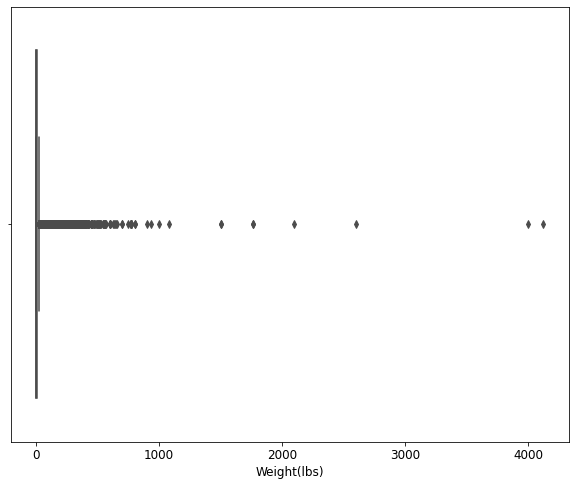

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Weight(lbs)"])

In [ ]:
# Boxplot of Weights
import plotly.express as px
fig = px.box(df, y=df["Weight(lbs)"])
fig.show()

The dataset has several outliers.

**Prepare the Data**

The unique value counts for PickupZone and DeliveryZone seem high. Looking at these two columns show some string values have lowercase letters. Convert Pickup column to uppercase letters.

In [ ]:
# Convert lowercase string to uppercase string in PickupZone columns.
df['PickupZone'] = df['PickupZone'].str.upper() 

In [ ]:
#Drop attributes that provide no useful information
df.drop(columns=['DeliveryZone','DeliverBy','DateTypeID', 'TimeWindowID', 'DayOfWeekID','VehicleTypeID','ServiceTypeID','Pieces','ScheduledOrderNo'], axis=1, inplace = True) 
df.head(5)

,OrderNo,ServiceType,ScheduledOrder,VehicleType,Weight(lbs),ReadyTime,PickupZone,ReadyTime(DayOfWeek),ReadyTime(Hour),TimeWindowDescription,DateType
0,6917458,DIRECT,1,CAR,3.0,01/01/2019 01:00,L1Z,Tuesday,1,Before 8am,Holiday
1,6918082,DIRECT,0,CAR,0.5,01/01/2019 05:53,L4C,Tuesday,5,Before 8am,Holiday
2,6917518,DIRECT,1,CAR,1.0,01/01/2019 07:30,L3P,Tuesday,7,Before 8am,Holiday
3,6917520,DIRECT,1,CAR,1.0,01/01/2019 07:30,L3P,Tuesday,7,Before 8am,Holiday
4,6917521,DIRECT,1,CAR,1.0,01/01/2019 07:30,L3P,Tuesday,7,Before 8am,Holiday


In [ ]:
# Remove rows with missing values
df = df.dropna(axis=0, how='any')

In [ ]:
df.rename(columns={df.columns[4]:"Weights"}, inplace=True)

In [ ]:
# Remove weights outliers over 500 lbs from the dataset
df = df.loc[df.Weights<500.0]
df.shape

(157405, 11)

In [ ]:
import datetime

df['ReadyTime'] = pd.to_datetime(df['ReadyTime'])
df['ReadyTime'] = df['ReadyTime'].dt.strftime('%m/%d/%Y %H')


In [ ]:
df.sort_values(by='ReadyTime', inplace=True)

In [ ]:
df = df.groupby(['ReadyTime','ServiceType','ScheduledOrder','VehicleType','PickupZone','TimeWindowDescription']).agg({'OrderNo':'nunique','Weights':'sum'})

In [ ]:
df = df.reset_index()

In [ ]:
df.head(5)

,ReadyTime,ServiceType,ScheduledOrder,VehicleType,PickupZone,TimeWindowDescription,OrderNo,Weights
0,01/01/2019 01,DIRECT,1,CAR,L1Z,Before 8am,1,3.0
1,01/01/2019 05,DIRECT,0,CAR,L4C,Before 8am,1,0.5
2,01/01/2019 07,DIRECT,1,CAR,L3P,Before 8am,3,3.0
3,01/01/2019 08,DIRECT,1,CAR,L4C,8am-9am,10,10.0
4,01/01/2019 08,DIRECT,1,CAR,L4E,8am-9am,1,1.0


In [ ]:
df.rename(columns={df.columns[6]:"Quantity_of_Pickups"}, inplace=True)

In [ ]:
df['Month'] = pd.DatetimeIndex(df['ReadyTime']).month
df['Day_of_Month'] = pd.DatetimeIndex(df['ReadyTime']).day
df['ReadyTime(DayOfWeek)'] = pd.DatetimeIndex(df['ReadyTime']).weekday
df['ReadyTime(Hour)'] = pd.DatetimeIndex(df['ReadyTime']).hour

In [ ]:
# setting the index for the data 
df = df.set_index(['ReadyTime']) 

# converting index to datetime index 
df.index = pd.to_datetime(df.index)

df.sort_index(inplace=True)

In [ ]:
df.head(5)

,ServiceType,ScheduledOrder,VehicleType,PickupZone,TimeWindowDescription,Quantity_of_Pickups,Weights,Month,Day_of_Month,ReadyTime(DayOfWeek),ReadyTime(Hour)
ReadyTime,,,,,,,,,,,
2019-01-01 01:00:00,DIRECT,1,CAR,L1Z,Before 8am,1,3.0,1,1,1,1
2019-01-01 05:00:00,DIRECT,0,CAR,L4C,Before 8am,1,0.5,1,1,1,5
2019-01-01 07:00:00,DIRECT,1,CAR,L3P,Before 8am,3,3.0,1,1,1,7
2019-01-01 08:00:00,DIRECT,1,CAR,L4C,8am-9am,10,10.0,1,1,1,8
2019-01-01 08:00:00,DIRECT,1,CAR,L4E,8am-9am,1,1.0,1,1,1,8


Text(0, 0.5, 'Weights(lbs) per hour')

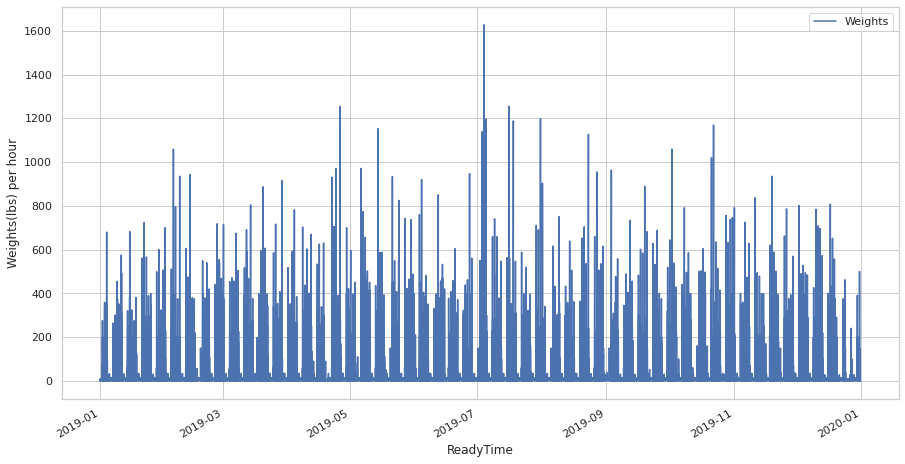

In [ ]:
df['Weights'].plot(figsize=(15,8), legend=True)
plt.ylabel("Weights(lbs) per hour")

Text(0, 0.5, 'Quantity of Pickups')

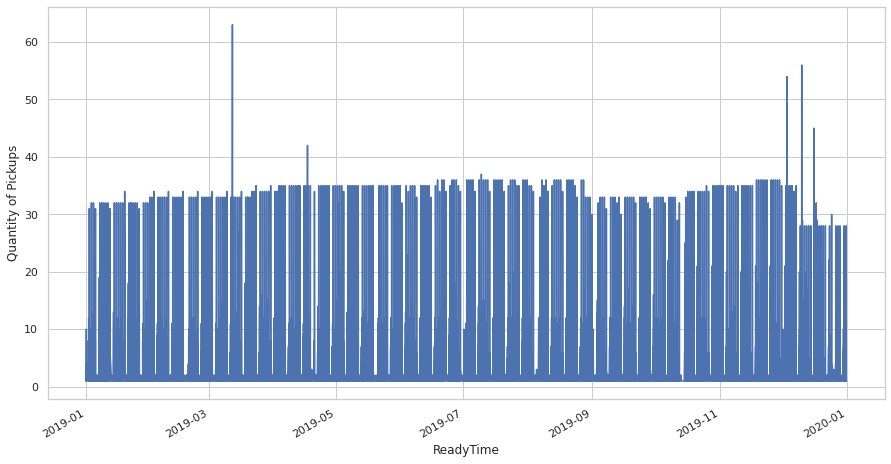

In [ ]:
df['Quantity_of_Pickups'].plot(figsize=(15,8))
plt.ylabel("Quantity of Pickups")

In [ ]:
import plotly.express as px 
fig = px.line(df, x=df.index,y=df['Quantity_of_Pickups']) 
fig.show()

In [ ]:
import plotly.graph_objects as go
dec_last_week_2019 = df['Quantity_of_Pickups'].loc['2019-12-22 00:00:00':'2019-12-31 23:59:00']
fig = px.line(df, x=dec_last_week_2019.index,y=dec_last_week_2019)
fig.update_layout(xaxis_range=['2019-12-22 00:00:00','2019-12-31 23:59:00'], title="Last week of 2019 Pickups",
    xaxis_title="Time",
    yaxis_title="Quantity of Pickups") 
fig.show()


In [ ]:
#Correlation between Quantity of Pickup and Weights
correlation = df['Quantity_of_Pickups'].corr(df['Weights'])
correlation

0.17525031595138424

In [ ]:
#Make a copy of cleaned dataset
df1 = df.copy()

In [ ]:
# Make polynomial features 
df1['Weights2'] = df1['Weights']**2
df1['Weights2_*_pickup'] = df1['Weights2']*df1['Quantity_of_Pickups']

In [ ]:
#Look for correlations
corr_matrix = df1.corr()
corr_matrix["Quantity_of_Pickups"].sort_values(ascending=False)

Quantity_of_Pickups     1.000000
Weights                 0.175250
Weights2_*_pickup       0.170096
Weights2                0.137410
ReadyTime(Hour)         0.088208
ScheduledOrder          0.071848
ReadyTime(DayOfWeek)    0.012989
Month                   0.003694
Day_of_Month           -0.003082
Name: Quantity_of_Pickups, dtype: float64

In [ ]:
#Set Target variable
y2 = df1['Quantity_of_Pickups']

In [ ]:
#Set Predictor variables
X = df1.drop(columns='Quantity_of_Pickups', axis=1) 

In [ ]:
#get categorial features for encoding
num_features = ['Weights','Weights2', 'Weights2_*_pickup']
X_num = X[num_features]
X_cat = X.drop(num_features,axis=1)

In [ ]:
#Create dummy variables based on the categorical variables
X_cat = pd.get_dummies(X_cat, columns=['ServiceType'], drop_first=True,prefix='ServiceType')
X_cat = pd.get_dummies(X_cat, columns=['PickupZone'], drop_first=True,prefix='PickupZone')
X_cat = pd.get_dummies(X_cat, columns=['ReadyTime(DayOfWeek)'], drop_first=True,prefix='ReadyTime(DayOfWeek)')
X_cat = pd.get_dummies(X_cat, columns=['ReadyTime(Hour)'], drop_first=True,prefix='ReadyTime(Hour)')
X_cat = pd.get_dummies(X_cat, columns=['TimeWindowDescription'], drop_first=True,prefix='TimeWindowDescription')
X_cat = pd.get_dummies(X_cat, columns=['ScheduledOrder'], drop_first=True,prefix='ScheduledOrder')
X_cat = pd.get_dummies(X_cat, columns=['Month'], drop_first=True,prefix='Month')
X_cat = pd.get_dummies(X_cat, columns=['Day_of_Month'], drop_first=True,prefix='Day_of_Month')
X_cat = pd.get_dummies(X_cat, columns=['VehicleType'], drop_first=True,prefix='VehicleType')

In [ ]:
X2 = pd.concat([X_num,X_cat], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
print(f"X2_train.shape: {X2_train.shape}")
print(f"X2_test.shape: {X2_test.shape}")
print(f"y2_train.shape: {y2_train.shape}")
print(f"y2_test.shape: {y2_test.shape}")

X2_train.shape: (71495, 362)
X2_test.shape: (30641, 362)
y2_train.shape: (71495,)
y2_test.shape: (30641,)


In [ ]:
# Scale numerical features
cat_features = X_cat.columns
X2_train_num_features = num_features
X2_train_cat_features = cat_features

In [ ]:
# Scale the non categorical train and test data

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(X2_train_num_features)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(X2_train_cat_features))
    ])


from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),    
    ])

# Convert the X2_train and X2_test into DataFrames before transforming the data.
X2_train = pd.DataFrame(X2_train)
X2_test = pd.DataFrame(X2_test)

X2_train_prepared = full_pipeline.fit_transform(X2_train)
X2_test_prepared = full_pipeline.transform(X2_test)

**Train several regression models using default model parameters**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def display_scores(scores):
    print("CV Scores:", scores)
    print("CV Mean:", scores.mean())  

Linear Regression with transformation

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X2_train_prepared, np.log(y2_train))
linear_predictions = linear_reg.predict(X2_train_prepared)
linear_mse = mean_squared_error(np.log(y2_train), linear_predictions)
linear_rmse = np.sqrt(linear_mse)
print('Train linear_rmse: ',linear_rmse)
linear_scores = cross_val_score(LinearRegression(), X2_train_prepared, np.log(y2_train), scoring="neg_mean_squared_error", cv=5)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores)

Train linear_rmse:  0.40933576092855484
CV Scores: [4.14794640e-01 2.12607069e+08 3.28823746e+09 4.69544371e+08
 6.52842997e+08]
CV Mean: 924646380.3426788


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)
ridge_reg.fit(X2_train_prepared,np.log(y2_train) )
ridge_predictions = ridge_reg.predict(X2_train_prepared)
ridge_mse = mean_squared_error(np.log(y2_train), ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print('Train ridge_rmse: ',ridge_rmse)
ridge_scores = cross_val_score(Ridge(random_state=42), X2_train_prepared, np.log(y2_train), scoring="neg_mean_squared_error", cv=5)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Train ridge_rmse:  0.40935212865716886
CV Scores: [0.41472714 0.40824253 0.4051705  0.41307103 0.41094923]
CV Mean: 0.41043208560578154


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42)
lasso_reg.fit(X2_train_prepared,np.log(y2_train) )
lasso_predictions = lasso_reg.predict(X2_train_prepared)
lasso_mse = mean_squared_error(np.log(y2_train), lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print('Train lasso_rmse: ',lasso_rmse)
lasso_scores = cross_val_score(Lasso(random_state=42), X2_train_prepared, np.log(y2_train), scoring="neg_mean_squared_error", cv=5)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Train lasso_rmse:  0.4946310517431468
CV Scores: [0.49755705 0.48613314 0.48935747 0.4985704  0.50145686]
CV Mean: 0.4946149833295725


ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(random_state=42)
elastic_reg.fit(X2_train_prepared,np.log(y2_train) )
elastic_predictions = elastic_reg.predict(X2_train_prepared)
elastic_mse = mean_squared_error(np.log(y2_train), elastic_predictions)
elastic_rmse = np.sqrt(elastic_mse)
print('Train elastic_rmse: ',elastic_rmse)
elastic_scores = cross_val_score(ElasticNet(random_state=42), X2_train_prepared, np.log(y2_train), scoring="neg_mean_squared_error", cv=5)
elastic_rmse_scores = np.sqrt(-elastic_scores)
display_scores(elastic_rmse_scores)

Train elastic_rmse:  0.4946310517431468
CV Scores: [0.49755705 0.48613314 0.48935747 0.4985704  0.50145686]
CV Mean: 0.4946149833295725


DecisionTree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dtree_scores = cross_val_score(dtree_reg, X2_train_prepared, y2_train, scoring="neg_mean_squared_error", cv=5)
dtree_rmse_scores = np.sqrt(-dtree_scores)
display_scores(dtree_rmse_scores)

CV Scores: [1.40541463 1.31629719 1.35638764 1.26484238 1.29680841]
CV Mean: 1.3279500505801949


Bagging Regression

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(DecisionTreeRegressor(max_depth = 2, random_state = 42), n_estimators = 100, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 42)
bag_scores = cross_val_score(bag_reg, X2_train_prepared, y2_train, scoring="neg_mean_squared_error", cv=5)
bag_rmse_scores = np.sqrt(-bag_scores)
display_scores(bag_rmse_scores)

CV Scores: [1.37836812 1.27555223 1.29364008 1.26196779 1.25204062]
CV Mean: 1.2923137705489034


ExtraTrees regression

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extratrees_reg = ExtraTreesRegressor(n_estimators = 100, criterion = "mse", max_depth = 2, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 42 )
extratrees_scores = cross_val_score(extratrees_reg, X2_train_prepared, y2_train, scoring="neg_mean_squared_error", cv=5)
extratrees_rmse_scores = np.sqrt(-extratrees_scores)
display_scores(extratrees_rmse_scores)

CV Scores: [1.7221183  1.63865243 1.60761345 1.64750925 1.69987639]
CV Mean: 1.6631539639554582


RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators = 100, criterion = "mse", max_depth = 2, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 42 )
ranfor_scores = cross_val_score(rnd_reg, X2_train_prepared, y2_train, scoring="neg_mean_squared_error", cv=5)
ranfor_rmse_scores = np.sqrt(-ranfor_scores)
display_scores(ranfor_rmse_scores)

CV Scores: [1.37838533 1.27432354 1.29293989 1.26190169 1.25156743]
CV Mean: 1.291823575315826


AdaBoost Regression

In [ ]:
from sklearn.ensemble  import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 2, random_state = 42), n_estimators = 100, learning_rate = 1.0, random_state = 42)
ada_scores = cross_val_score(ada_reg, X2_train_prepared, y2_train, scoring="neg_mean_squared_error", cv=5)
ada_rmse_scores = np.sqrt(-ada_scores)
display_scores(ada_rmse_scores)

CV Scores: [1.5669836  1.54554583 1.5358225  1.46395661 1.45144882]
CV Mean: 1.5127514707491683


GradientBoost Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 1.0, random_state = 42)
grad_scores = cross_val_score(gbrt, X2_train_prepared, y2_train, scoring="neg_mean_squared_error", cv=5)
grad_rmse_scores = np.sqrt(-grad_scores)
display_scores(grad_rmse_scores)

CV Scores: [0.5150585  0.36870437 0.42455464 0.30266    0.29436188]
CV Mean: 0.38106787717327767


XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_scores = cross_val_score(xgb_reg, X2_train_prepared, y2_train, scoring="neg_mean_squared_error", cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

[01:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CV Scores: [0.51969516 0.42945455 0.43844677 0.37126572 0.36122697]
CV Mean: 0.4240178342009668


**Fine-Tune promising models**

Fine-Tune Ridge Regressor

In [ ]:
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000]}]
grid_search_rr = GridSearchCV(Ridge(random_state=42), param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search_rr.fit(X2_train_prepared, np.log(y2_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 1}
0.4104462551762213


Test Ridge Regressor Model

In [ ]:
ridge_model = grid_search_rr.best_estimator_ 

y_test_estimation_rr = ridge_model.predict(X2_test_prepared)

ridge_mse = mean_squared_error(np.log(y2_test), y_test_estimation_rr)
ridge_rmse = np.sqrt(ridge_mse)
print(ridge_rmse)

0.4181235587799942


In [ ]:
# first test labels
y2_test[0]

1

In [ ]:
# predict test labels for Ridge Regressor
y_predict_test_label_rr_2019_09_17_9 = int(np.exp(y_test_estimation_rr[0]))
y_predict_test_label_rr_2019_09_17_9

1

Fine-tune Gradient Boost Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 300]
subsample = [0.8,1.0]
learning_rate = [1, 0.1,0.01]
max_depth = [2,3] 
min_samples_leaf = [1,2,3]

gradboost_reg = GradientBoostingRegressor(random_state=42)
param_distributions = {'n_estimators': n_estimators,'subsample':subsample,'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf,
                        'learning_rate': learning_rate}

gbrt_random_search_cv = RandomizedSearchCV(gradboost_reg, param_distributions, cv = 5,scoring="neg_mean_squared_error" , verbose=2, n_jobs=-1, refit=True)
gbrt_random_search_cv.fit(X2_train_prepared, y2_train)

gbrt_best_params_ = gbrt_random_search_cv.best_params_
gbrt_best_estimators_ = gbrt_random_search_cv.best_estimator_

print(gbrt_best_params_)
print(gbrt_best_estimators_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 84.3min finished


{'subsample': 0.8, 'n_estimators': 300, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 1}
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
print('GradientBoost Regressor best score:',np.sqrt(-gbrt_random_search_cv.best_score_))

GradientBoost Regressor best score: 0.32864216781468525


Test GradientBoost Regressor Model

In [ ]:
gbrt_model = gbrt_random_search_cv.best_estimator_ 

y_test_estimation_gbrt = gbrt_model.predict(X2_test_prepared)

gbrt_mse = mean_squared_error(y2_test, y_test_estimation_gbrt)
gbrt_rmse = np.sqrt(gbrt_mse)
print(gbrt_rmse)

0.33548508120408066


In [ ]:
# predict test labels for GradientBoost Regressor
y_predict_test_label_gbrt_2019_09_17_9 = int(y_test_estimation_gbrt[0])
y_predict_test_label_gbrt_2019_09_17_9

1

In [ ]:
cat_features = list(cat_features)

In [ ]:
num_features = list(num_features)

In [ ]:
attributes = num_features + cat_features 


In [ ]:
# features of importance

X2_train_prepared = pd.DataFrame(X2_train_prepared)
#attributes = X2_train_prepared.columns
features_importances = gbrt_random_search_cv.best_estimator_.feature_importances_
sorted(zip(features_importances,attributes), reverse=True)

[(0.4681235333136937, 'ServiceType_DAILY SCHEDULED'),
 (0.3467417537309182, 'Weights2_*_pickup'),
 (0.07289459269378973, 'Weights2'),
 (0.04972474227807321, 'Weights'),
 (0.0385434945684662, 'VehicleType_CAR'),
 (0.010298896579910618, 'PickupZone_L3Y'),
 (0.002241071487132189, 'PickupZone_M8Z'),
 (0.0018236902738323613, 'PickupZone_M5V'),
 (0.0012830266835752546, 'Day_of_Month_17'),
 (0.0009851247239891876, 'PickupZone_L6B'),
 (0.0009788759199153175, 'ScheduledOrder_1'),
 (0.0009296642579697192, 'ServiceType_SAMEDAY'),
 (0.0007392652594135972, 'TimeWindowDescription_After 5pm'),
 (0.0007234091211310538, 'ReadyTime(Hour)_1'),
 (0.0003813034854526107, 'PickupZone_L4W'),
 (0.0002649971539572815, 'PickupZone_M2J'),
 (0.00020816810248961085, 'Month_12'),
 (0.00019917257519156846, 'TimeWindowDescription_8am-9am'),
 (0.00017153531716972953, 'PickupZone_L4K'),
 (0.00016888114589402918, 'Day_of_Month_15'),
 (0.00016299079710811469, 'PickupZone_M1W'),
 (0.00011742721499156379, 'ReadyTime(DayOfWe

Save the file

In [ ]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(gbrt_random_search_cv, 'project9.pkl')


['project9.pkl']